In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.shape

(200, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
# check for missing values
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
# removing a column customerID
data.drop(columns="CustomerID",inplace=True)


In [9]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


### Data Visualization

Text(0.5, 1.0, 'Annual Income (k$)')

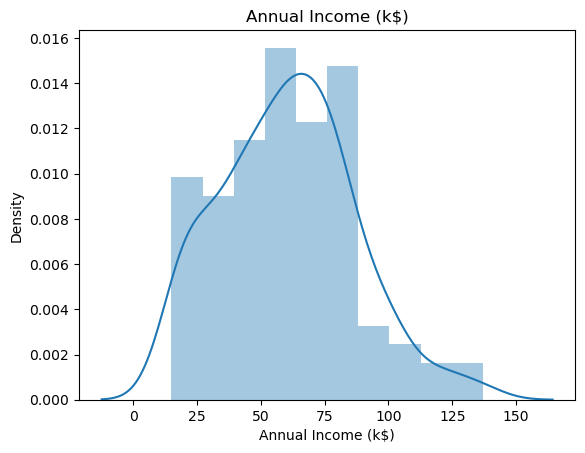

In [10]:
sns.distplot(data['Annual Income (k$)'])
plt.title("Annual Income (k$)")

Text(0.5, 1.0, 'Spending Score (1-100)')

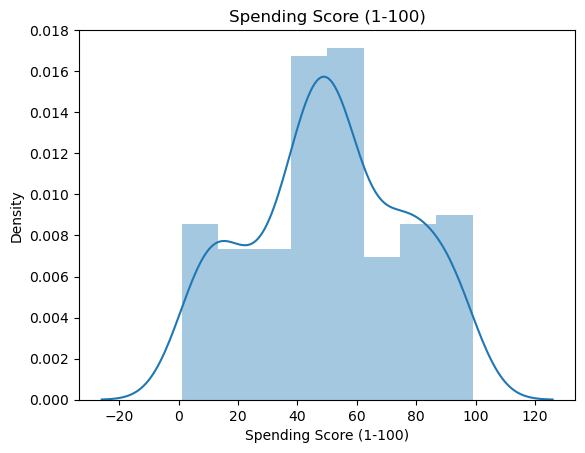

In [11]:
sns.distplot(data['Spending Score (1-100)'])
plt.title('Spending Score (1-100)')

<Axes: >

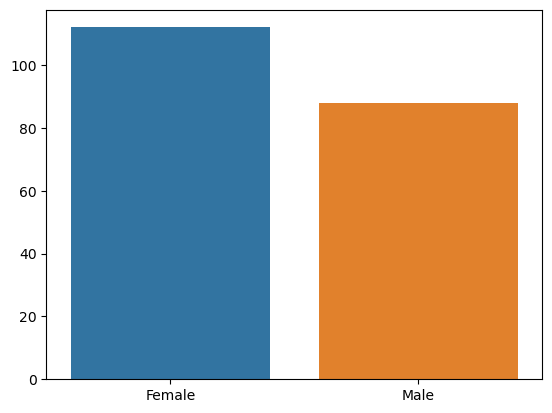

In [12]:
gender=data.Gender.value_counts()
sns.barplot(x=gender.index,y=gender.values)

In [13]:
X=data[["Annual Income (k$)","Spending Score (1-100)"]]

In [14]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

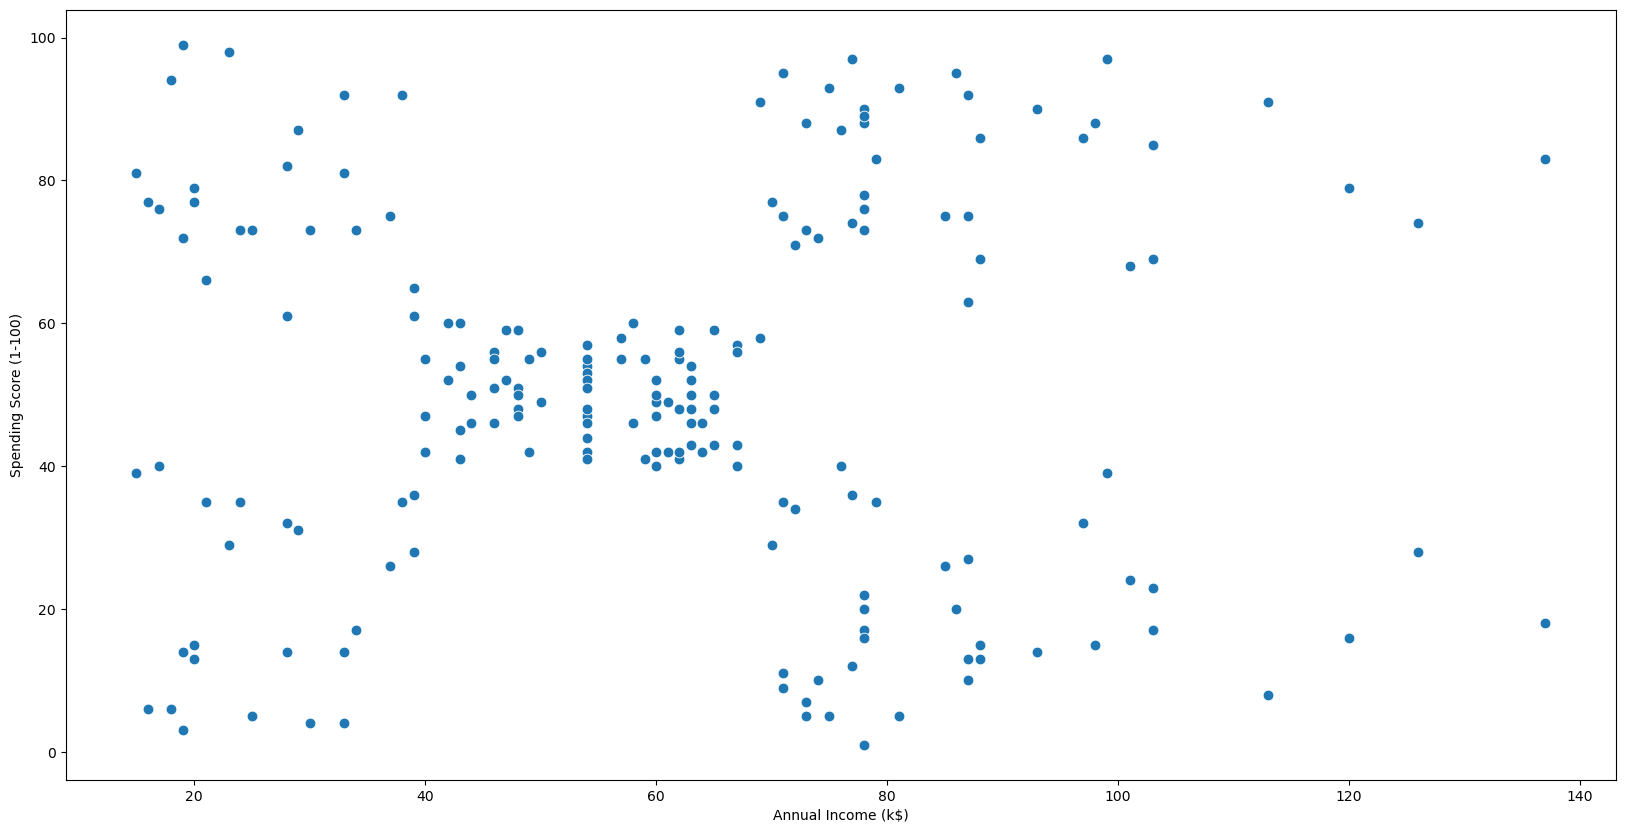

In [15]:
#Scatterplot on Annual Income (K$) and Spending Score (1-100)
plt.figure(figsize=(20,10))
sns.scatterplot(x="Annual Income (k$)",y="Spending Score (1-100)",data=X,s=60)

In [21]:
# to find best "K" by ELBOW Method.
wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,random_state=0,init="random")
  km.fit(X)
  wcss.append(km.inertia_) 
    

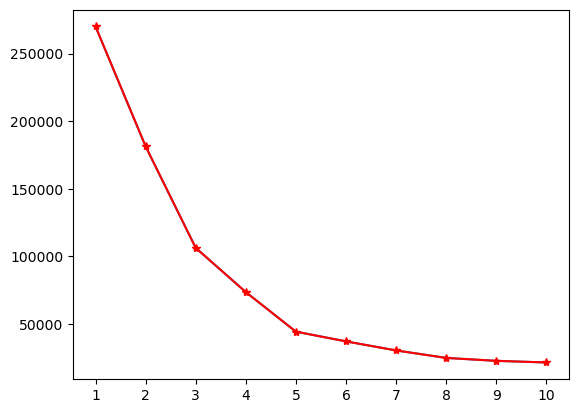

In [23]:
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss,color='red',marker='*')
plt.xticks(np.arange(1,11,1))
plt.show()

# The value of Number of clusters K=5 for KMeans clustering

In [24]:
k=KMeans(n_clusters=5,random_state=36,init='random')
k.fit(X)
y=k.predict(X)
data["Labels"]=y
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Labels
0,Male,19,15,39,1
1,Male,21,15,81,4
2,Female,20,16,6,1
3,Female,23,16,77,4
4,Female,31,17,40,1


In [25]:
print(y)

[1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 2 1 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 3 0 2 0 3 0 3 0 2 0 3 0 3 0 3 0 3 0 2 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0]


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

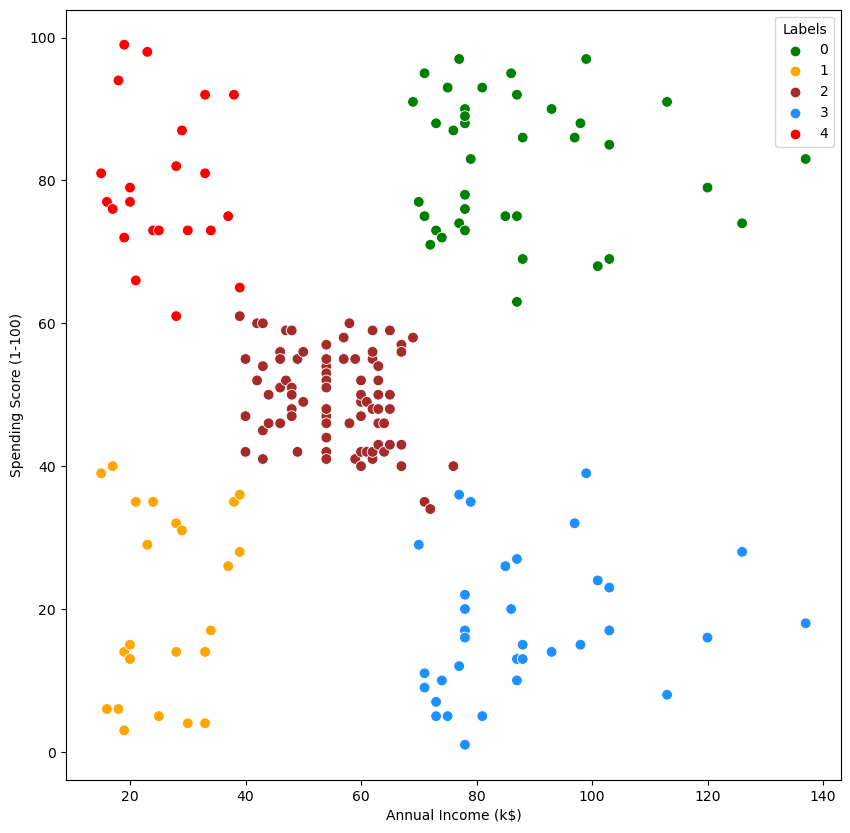

In [26]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Labels', palette=['green', 'orange', 'brown', 'dodgerblue', 'red'], legend='full', data=data, s=60)


#### Applying KMeans++

In [27]:
wcss1=[]
for i in range(1,11):
 kmm=KMeans(n_clusters=i,init='k-means++')
 kmm.fit(X)
 wcss1.append(kmm.inertia_)



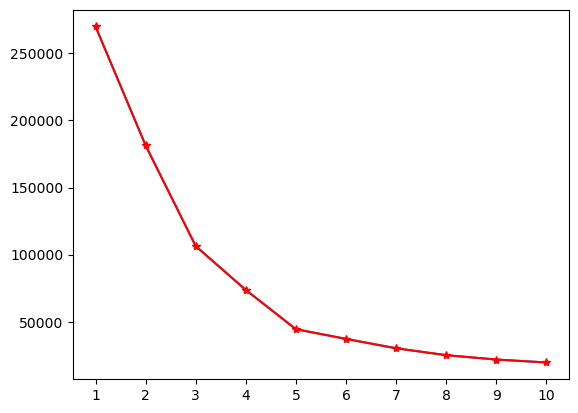

In [32]:
plt.plot(range(1,11),wcss1)
plt.plot(range(1,11),wcss1,color='red',marker='*')
plt.xticks(np.arange(1,11,1))
plt.show()

### The Number of Cluster by k-means++ is also 5 so the cluster will be the same.

In [33]:
clst0=data[data['Labels']==0]
print("Number of points in cluster 0:--",len(clst0))
print()
print(clst0)

Number of points in cluster 0:-- 39

     Gender  Age  Annual Income (k$)  Spending Score (1-100)  Labels
123    Male   39                  69                      91       0
125  Female   31                  70                      77       0
127    Male   40                  71                      95       0
129    Male   38                  71                      75       0
131    Male   39                  71                      75       0
133  Female   31                  72                      71       0
135  Female   29                  73                      88       0
137    Male   32                  73                      73       0
139  Female   35                  74                      72       0
141    Male   32                  75                      93       0
143  Female   32                  76                      87       0
145    Male   28                  77                      97       0
147  Female   32                  77                      74      

In [34]:
clst1=data[data['Labels']==1]
print("Number of points in cluster 1:--",len(clst1))
print()
print(clst1)

Number of points in cluster 1:-- 23

    Gender  Age  Annual Income (k$)  Spending Score (1-100)  Labels
0     Male   19                  15                      39       1
2   Female   20                  16                       6       1
4   Female   31                  17                      40       1
6   Female   35                  18                       6       1
8     Male   64                  19                       3       1
10    Male   67                  19                      14       1
12  Female   58                  20                      15       1
14    Male   37                  20                      13       1
16  Female   35                  21                      35       1
18    Male   52                  23                      29       1
20    Male   35                  24                      35       1
22  Female   46                  25                       5       1
24  Female   54                  28                      14       1
26  Female 

In [35]:
clst2=data[data['Labels']==2]
print("Number of points in cluster 2:--",len(clst2))
print()
print(clst2)

Number of points in cluster 2:-- 81

     Gender  Age  Annual Income (k$)  Spending Score (1-100)  Labels
43   Female   31                  39                      61       2
46   Female   50                  40                      55       2
47   Female   27                  40                      47       2
48   Female   29                  40                      42       2
49   Female   31                  40                      42       2
..      ...  ...                 ...                     ...     ...
121  Female   38                  67                      40       2
122  Female   40                  69                      58       2
126    Male   43                  71                      35       2
132  Female   25                  72                      34       2
142  Female   28                  76                      40       2

[81 rows x 5 columns]


In [36]:
clst3=data[data['Labels']==3]
print("Number of points in cluster 3:--",len(clst3))
print()
print(clst3)

Number of points in cluster 3:-- 35

     Gender  Age  Annual Income (k$)  Spending Score (1-100)  Labels
124  Female   23                  70                      29       3
128    Male   59                  71                      11       3
130    Male   47                  71                       9       3
134    Male   20                  73                       5       3
136  Female   44                  73                       7       3
138    Male   19                  74                      10       3
140  Female   57                  75                       5       3
144    Male   25                  77                      12       3
146    Male   48                  77                      36       3
148  Female   34                  78                      22       3
150    Male   43                  78                      17       3
152  Female   44                  78                      20       3
154  Female   47                  78                      16      

In [37]:
clst4=data[data['Labels']==4]
print("Number of points in cluster 4:--",len(clst4))
print()
print(clst4)

Number of points in cluster 4:-- 22

    Gender  Age  Annual Income (k$)  Spending Score (1-100)  Labels
1     Male   21                  15                      81       4
3   Female   23                  16                      77       4
5   Female   22                  17                      76       4
7   Female   23                  18                      94       4
9   Female   30                  19                      72       4
11  Female   35                  19                      99       4
13  Female   24                  20                      77       4
15    Male   22                  20                      79       4
17    Male   20                  21                      66       4
19  Female   35                  23                      98       4
21    Male   25                  24                      73       4
23    Male   31                  25                      73       4
25    Male   29                  28                      82       4
27    Male 